In [3]:
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

import torchvision
from torchvision import transforms
from torchsummary import summary

from albumentations import (
    ToFloat, 
    CLAHE, 
    RandomRotate90, 
    Transpose, 
    ShiftScaleRotate, 
    Blur, 
    OpticalDistortion, 
    GridDistortion, 
    HueSaturationValue, 
    IAAAdditiveGaussianNoise, 
    GaussNoise, 
    MotionBlur, 
    MedianBlur, 
    IAAPiecewiseAffine, 
    IAASharpen, 
    IAAEmboss, 
    RandomContrast, 
    RandomBrightness, 
    Flip, 
    OneOf, 
    Compose
)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numbers
from sklearn.model_selection import train_test_split

from PIL import Image
import math
from tqdm import tqdm

import os
from tqdm import tqdm_notebook as tqdm

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import warnings
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import matplotlib.patches as patches
import seaborn as sns
from pylab import rcParams

%matplotlib inline 
plt.style.use('seaborn')
sns.set(style='whitegrid',color_codes=True)

# classifiaction 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import catboost as ctb

# for classification
from sklearn.metrics import accuracy_score

# model selection
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Hp optimization imports
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import mlflow

import re
import eli5
import gc
import random    
import math
import psutil
import pickle
import datetime
from time import time

# save/load models
from joblib import dump
from joblib import load


import numpy
from keras.optimizers import Adam
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation
from keras.optimizers import Adam
# fix random seed for reproducibility
numpy.random.seed(7)
from keras.callbacks.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, train_test_split, GroupKFold, GroupShuffleSplit

from numpy import zeros, newaxis

Using TensorFlow backend.
/Users/kirillvladimirov/PycharmProjects/cv_projects/venv/lib/python3.7/site-packages/eli5/base_utils.py:28: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  init_args = inspect.getargspec(class_.__init__)
/Users/kirillvladimirov/PycharmProjects/cv_projects/venv/lib/python3.7/site-packages/eli5/base_utils.py:36: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  return attr.s(class_, these=these, init=False, slots=True, **attrs_kwargs)  # type: ignore


In [2]:
from sklearn.metrics import log_loss
y_true = [0, 0, 1, 1, 1]
y_pred = [[.9, .1], [.8, .2], [.3, .7], [.01, .99], [.4, .7]]
log_loss(y_true, y_pred)

0.22944289410146546

In [4]:
np.log(0.6)

-0.5108256237659907

In [2]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
from keras.models import load_model

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [3]:
root = "../../data/raw/Gamma_Log_Facies_Type_Prediction/"
models_root = "../../models/Gamma_Log_Facies_Type_Prediction/"
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
pd.set_option('max_columns', 150)
# rcParams['figure.figsize'] = 16,8

In [4]:
def show_history(history, metric='mse'):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [5]:
def to_categorical(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)

In [6]:
%%time
full_train_df = pd.read_csv(root + "Train_File.csv")
full_test_df = pd.read_csv(root + "Test_File.csv")
submit_df = pd.read_csv(root + "Submission_File.csv")


CPU times: user 2.95 s, sys: 381 ms, total: 3.33 s
Wall time: 3.34 s


In [7]:
scaler = StandardScaler()
full_train_df[["GR"]] = scaler.fit_transform(full_train_df[["GR"]])
full_test_df[["GR"]] = scaler.transform(full_test_df[["GR"]])

In [8]:
full_train_df.shape, full_test_df.shape, submit_df.shape

((4400000, 4), (2200000, 4), (2200000, 2))

In [9]:
train = np.array([x.values[:,2:3].T for group, x in full_train_df.groupby('well_id')], dtype='float32')
target = np.array([x.values[:,3:].T for group, x in full_train_df.groupby('well_id')], dtype='float32')
test = np.array([x.values[:,3:4].T for group, x in full_test_df.groupby('well_id')], dtype='float32')

In [10]:
train.shape, target.shape, test.shape

((4000, 1, 1100), (4000, 1, 1100), (2000, 1, 1100))

In [11]:
train_X = train.reshape(train.shape[0], train.shape[2])
train_y = target.reshape(target.shape[0], target.shape[2])
test_X = test.reshape(test.shape[0], test.shape[2])

In [12]:
train_X.shape, train_y.shape, test_X.shape

((4000, 1100), (4000, 1100), (2000, 1100))

In [13]:
train_y = train_y.astype(int)
train_y_cat = to_categorical(train_y, 5)

In [14]:
# train_y_cat = train_y_cat[:, :, :, newaxis]
train_X = train_X[:, :, newaxis]
test_X = test_X[:, :, newaxis]

In [15]:
train_X.shape, train_y_cat.shape, test_X.shape

((4000, 1100, 1), (4000, 1100, 5), (2000, 1100, 1))

In [21]:
# cv =     0.95559
# public = 0.95448

model = Sequential()
model.add(Bidirectional(LSTM(256, input_shape=(1100, 1), return_sequences=True)))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(5)))
model.add(Activation('softmax'))

learning_rate = 0.001
epochs = 80
decay_rate = learning_rate / epochs
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint(models_root+'k02_baseline_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
adam = Adam(learning_rate, decay=decay_rate)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [22]:
%%time

history = model.fit(train_X, train_y_cat, batch_size=128, epochs=epochs, validation_split=0.2, callbacks=[es, mc])

Train on 3200 samples, validate on 800 samples
Epoch 1/80
3200/3200 [==============================] - 259s 81ms/step - loss: 1.0445 - accuracy: 0.6124 - val_loss: 0.8735 - val_accuracy: 0.6517

Epoch 00001: val_accuracy improved from -inf to 0.65171, saving model to ../../models/Gamma_Log_Facies_Type_Prediction/k02_baseline_best_model.h5
Epoch 2/80
3200/3200 [==============================] - 264s 83ms/step - loss: 0.8583 - accuracy: 0.6623 - val_loss: 0.8032 - val_accuracy: 0.6929

Epoch 00002: val_accuracy improved from 0.65171 to 0.69288, saving model to ../../models/Gamma_Log_Facies_Type_Prediction/k02_baseline_best_model.h5
Epoch 3/80
3200/3200 [==============================] - 288s 90ms/step - loss: 0.7562 - accuracy: 0.7191 - val_loss: 0.7006 - val_accuracy: 0.7372

Epoch 00003: val_accuracy improved from 0.69288 to 0.73717, saving model to ../../models/Gamma_Log_Facies_Type_Prediction/k02_baseline_best_model.h5
Epoch 4/80
3200/3200 [==============================] - 290s 91ms

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 1100, 512)         528384    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1100, 512)         0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 1100, 5)           2565      
_________________________________________________________________
activation_2 (Activation)    (None, 1100, 5)           0         
Total params: 530,949
Trainable params: 530,949
Non-trainable params: 0
_________________________________________________________________


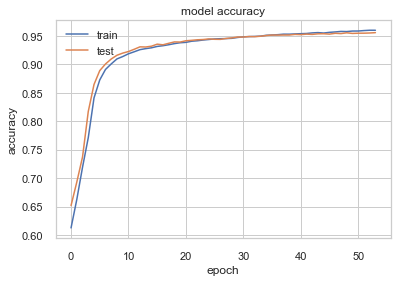

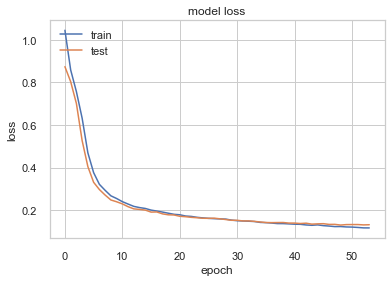

In [26]:
show_history(history, 'accuracy')

In [27]:
model_1 = load_model(models_root+'k02_baseline_best_model.h5')

In [28]:
%%time

y_hat = model_1.predict(test_X)

CPU times: user 3min 15s, sys: 49.3 s, total: 4min 4s
Wall time: 44.6 s


In [30]:
predict = np.argmax(y_hat.reshape((-1,5)), axis=1)

In [31]:
submit_df["label"] = predict
submit_df.to_csv(root+"submission.csv", index=False)
submit_df.head(20)

,unique_id,label
0,CAX_0,0
1,CAX_1,0
2,CAX_2,0
3,CAX_3,0
4,CAX_4,0
5,CAX_5,0
6,CAX_6,0
7,CAX_7,0
8,CAX_8,0
9,CAX_9,0


<BarContainer object of 5 artists>

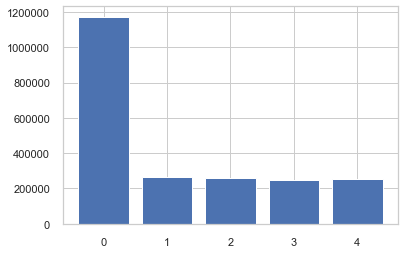

In [32]:
# Количество классов для предсказания
g = submit_df["label"].value_counts()
g = g.sort_index().T
plt.bar(g.index, g.values)